## 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("electronic_dataset.csv")

In [2]:
df.head()

,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800


In [3]:
#dropping timestamp as its not a required feature
df.drop('timestamp',axis=1,inplace=True)

In [4]:
df.rename(columns={'user_id': 'userID', 'prod_id': 'productID'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userID     500000 non-null  object 
 1   productID  500000 non-null  object 
 2   ratings    500000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 11.4+ MB


In [6]:
df.dtypes

userID        object
productID     object
ratings      float64
dtype: object

In [7]:
df.shape

(500000, 3)

In [8]:
df.isnull().sum()

userID       0
productID    0
ratings      0
dtype: int64

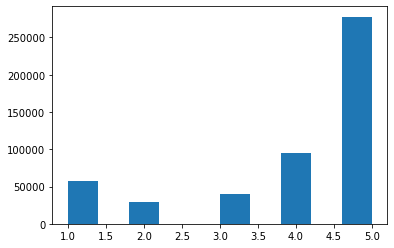

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['ratings'])
plt.show()

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


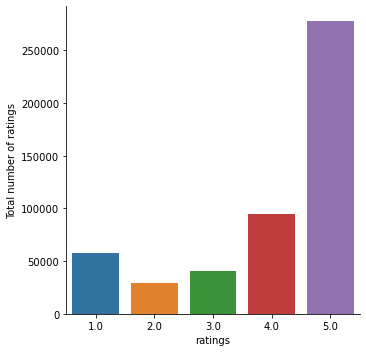

In [10]:
import seaborn as sns
g = sns.factorplot("ratings", data=df, kind='count')
g.set_ylabels("Total number of ratings")

In [11]:
df.userID.describe()

count            500000
unique           448368
top       A680RUE1FDO8B
freq                 36
Name: userID, dtype: object

In [12]:
df.productID.describe()

count         500000
unique        130138
top       B0074BW614
freq            1138
Name: productID, dtype: object

### EDA
There are 500000 records in the dataset<br>
There are no missing values in the dataset<br>
There are 448368 unique users in the dataset<br>
There are 130138 unique items in the dataset<br>
There are no outliers in the ratings column, since the total value counts add upto original number of rows<br>
Majority of the ratings are concentrated towards 5 stars

## 2. Build Popularity Recommender model

In [15]:
def popularity_recommender(userID, num_of_recommendations=5):
    product_grouped_by_rating = df.groupby(['productID']).agg({'ratings': 'count'}).reset_index()
    sorted_product = product_grouped_by_rating.sort_values(['ratings'], ascending = False) # ratings in descending order
    df2 = sorted_product.reset_index(drop=True)
    recommendations = df2.head(num_of_recommendations)
    recommendations.userID = userID
    return recommendations.productID

In [16]:
print(popularity_recommender('A2CX7LUOHB2NDG'))

0    B0074BW614
1    B00DR0PDNE
2    B007WTAJTO
3    B0019EHU8G
4    B006GWO5WK
Name: productID, dtype: object


In [18]:
print(popularity_recommender('A2WNBOD3WNDNKT'))

0    B0074BW614
1    B00DR0PDNE
2    B007WTAJTO
3    B0019EHU8G
4    B006GWO5WK
Name: productID, dtype: object


### since it is popularity based recommendation system, it returns the same list of the popular products for all users

## 3. Split the data randomly into a train and test dataset. ( For example, split it in 70/30 ratio)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size = 0.30, random_state=0)

## 4. Build Collaborative Filtering model

In [20]:
collaborative_filter = df.head(10000)
collaborative_filter.head()

,userID,productID,ratings
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0
2,A1SINU2I4IOPNU,B000GBO9IM,4.0
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0


In [24]:
pivot_df = collaborative_filter.pivot(index = 'userID', columns ='productID', values = 'ratings').fillna(0)
pivot_df.head()

productID,0972683275,1400532620,1400532655,140053271X,8862935293,9888002198,9983891204,9983902842,B000001OM5,B00000J0BM,...,B00K5ARKF8,B00K899B9Y,B00KA4UJD4,B00KDIT95G,B00KDR84QC,B00KFAG64O,B00KFAGCUM,B00KSLCU72,B00L403O94,B00LMOH8DU
userID,,,,,,,,,,,,,,,,,,,,,
A0039882N9YMEWTV40QZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0154198260VIT02KU4BW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0193442L7IJXD7HANDM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0266076X6KPZ6CCHGVS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03058242Q8HEE7R0P6UI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(pivot_df, k = 50)
sigma = np.diag(sigma)

In [29]:
user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
pred_df = pd.DataFrame(user_predicted_ratings, columns = pivot_df.columns)
pred_df.head()

productID,0972683275,1400532620,1400532655,140053271X,8862935293,9888002198,9983891204,9983902842,B000001OM5,B00000J0BM,...,B00K5ARKF8,B00K899B9Y,B00KA4UJD4,B00KDIT95G,B00KDR84QC,B00KFAG64O,B00KFAGCUM,B00KSLCU72,B00L403O94,B00LMOH8DU
0,-3.858509e-34,5.312101e-37,8.829806e-34,8.684734e-34,7.304922e-35,2.824105e-34,-8.682936e-34,2.359576e-34,1.088018e-35,2.781119e-34,...,-8.946691e-34,-7.888031e-34,3.878124e-34,-5.873718e-34,4.546641e-35,7.001503e-36,6.315665e-34,-1.629118e-34,-5.938557e-36,4.115509e-34
1,1.225323e-33,5.565277e-36,-2.777947e-33,-2.522150e-33,7.859786e-34,-8.260358e-34,2.256782e-33,-6.962585e-34,-2.124284e-34,-8.827552e-34,...,2.548394e-33,2.342902e-33,-1.120910e-33,1.633850e-33,-4.329332e-34,1.365426e-34,-1.847648e-33,5.132246e-34,-1.571517e-33,-1.215651e-33
2,-1.183246e-34,1.700509e-37,2.700833e-34,2.669728e-34,2.299120e-35,8.668094e-35,-2.657758e-34,7.199996e-35,-2.036262e-36,8.552254e-35,...,-2.743389e-34,-2.421535e-34,1.186246e-34,-1.801416e-34,1.264483e-35,5.876894e-36,1.938637e-34,-4.991359e-35,-2.691672e-36,1.259288e-34
3,-1.584738e-34,2.742141e-37,3.594346e-34,3.555792e-34,3.631149e-35,1.157963e-34,-3.523675e-34,9.616016e-35,-2.960946e-36,1.149130e-34,...,-3.657814e-34,-3.238989e-34,1.583560e-34,-2.411602e-34,2.519478e-35,6.375518e-36,2.586896e-34,-6.668530e-35,-1.512439e-35,1.672847e-34
4,1.842621e-34,5.630138e-37,-2.580181e-34,-3.877313e-34,9.910694e-35,-7.476725e-35,3.019322e-34,-7.211285e-35,7.292778e-34,-9.985872e-35,...,4.159647e-34,3.907370e-34,-1.550164e-34,2.194945e-34,-6.496674e-34,-5.585067e-34,-2.502402e-34,6.531931e-35,1.753925e-34,-1.364686e-34


In [38]:
def item_recommender(userID, pivot_df, pred_df, num_of_recommendations=5):
    user_idx = userID-1
    sort_prod_by_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    sort_prod_by_predictions = pred_df.iloc[user_idx].sort_values(ascending=False)
    
    df = pd.concat([sort_prod_by_ratings, sort_prod_by_predictions], axis=1)
    df.index.name = 'Recommended Items'
    df.columns = ['prod_by_ratings', 'prod_by_predictions']
    df = df.loc[df.prod_by_ratings == 0]   
    df = df.sort_values('prod_by_predictions', ascending=False)
    print(df.head(num_of_recommendations))

In [39]:
item_recommender(5, pivot_df, pred_df)

                   prod_by_ratings  prod_by_predictions
Recommended Items                                      
B0015AARJI                     0.0         1.383651e-16
B000LRMS66                     0.0         9.501256e-17
B002V88HFE                     0.0         3.783779e-17
B002BH3I9U                     0.0         3.481604e-17
B0007XJSQC                     0.0         3.281787e-17


## 5. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models

In [40]:
rmse_df = pd.concat([pivot_df.mean(), pred_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
rmse = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
rmse

0.00056

## 6. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products

In [42]:
item_recommender(20, pivot_df, predictions_df)

                   prod_by_ratings  prod_by_predictions
Recommended Items                                      
B00316263Y                     0.0         1.368448e-17
B003ES5ZUU                     0.0         1.117949e-17
B003ELYQGG                     0.0         9.983773e-18
B002WE6D44                     0.0         8.549165e-18
B00622AG6S                     0.0         7.825965e-18


## 8.Summarise your insights

The collaborative filtering algorithm uses user behavior for recommending items<br>
This algorithm first finds the similarity score between users, based on this similarity score, it then picks out the most similar users and recommends products which these similar users have liked or bought previously<br>
The popularity based items are solely based on the ratings count or frequency of a product(with or without weighted ratings<br>
There is no way to know the user habits, also the products with very few ratings will never make this list until a hybrid recommendation system is used such as popularity with random<br>
This approach can be weighted to make sure, random recommedations are for those products which have very low ratings count but high rating values<br>
There are limitations with collaborative filtering with a straightforward implementation, it is obeserved that the recommendations tend to be already popular, and the items from the long tail section might get ignored<br>
Users having higher correlation will tend to be similar